# Regression Anaysis Example in Pyhton

Atsushi Ishida (Kwansei Gakuin University)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from pylab import rcParams
rcParams['figure.figsize'] = 7.5,5

In [2]:
x = np.array([2.2, 4.1, 5.5, 1.9, 3.4, 2.6, 4.2, 3.7, 4.9, 3.2])
y = np.array([71, 81, 86, 72, 77, 73, 80, 81, 85, 74])
x_cen = x - np.mean(x)

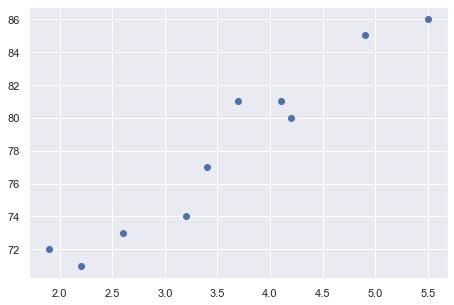

In [3]:
plt.scatter(x, y);

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

print('coefficient = ', model.coef_[0])
print('intercept = ', model.intercept_)
print('R square = ', model.score(x[:, np.newaxis], y))

coefficient =  4.523033191204751
intercept =  61.85277150739904
R square =  0.9339545635273928


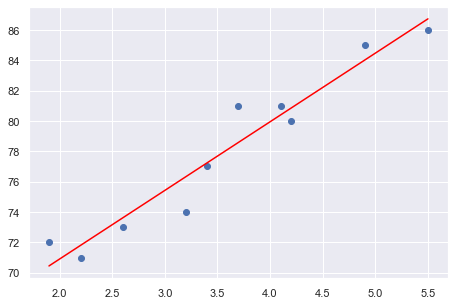

In [5]:
xfit = np.linspace(np.min(x), np.max(x), 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit, c="red");

## Least Square Method from scratch

In [6]:
from scipy.optimize import leastsq

def fit_function(par, x, y):
    a = par[0]
    b = par[1] 
    residuals = y-(a+b*x)
    return residuals

leastsq(fit_function,[0,0], args=(x_cen, y))[0]

array([78.        ,  4.52303317])

In [7]:
X = np.matrix(np.array([np.repeat(1, len(x_cen)), x_cen]).transpose())
X_t = X.transpose()
Y = np.matrix(y).transpose()
# (X'X)^{-1}
print("(X'X)^{-1} =\n", np.linalg.inv(X_t * X))
# X'y
print("X'y =\n", X_t * Y)
# (a, b) = (X'X)^{-1}X'y
print("(X'X)^{-1}X'y =\n", np.linalg.inv(X_t * X) * X_t * Y)

(X'X)^{-1} =
 [[1.00000000e-01 1.85640502e-17]
 [1.85640502e-17 8.36050497e-02]]
X'y =
 [[780. ]
 [ 54.1]]
(X'X)^{-1}X'y =
 [[78.        ]
 [ 4.52303319]]
